<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia


Estimated time needed: **40** minutes


In this lab, you will be performing web scraping to collect Falcon 9 historical launch records from a Wikipedia page titled `List of Falcon 9 and Falcon Heavy launches`

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_1_L2/images/Falcon9_rocket_family.svg)


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


More specifically, the launch records are stored in a HTML table shown below:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_1_L2/images/falcon9-launches-wiki.png)


  ## Objectives
Web scrap Falcon 9 launch records with `BeautifulSoup`: 
- Extract a Falcon 9 launch records HTML table from Wikipedia
- Parse the table and convert it into a Pandas data frame


First let's import required packages for this lab


In [1]:
!pip3 install beautifulsoup4
!pip3 install requests

In [3]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

and we will provide some helper functions for you to process web scraped HTML table


In [4]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


To keep the lab tasks consistent, you will be asked to scrape the data from a snapshot of the  `List of Falcon 9 and Falcon Heavy launches` Wikipage updated on
`9th June 2021`


In [5]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

Next, request the HTML page from the above URL and get a `response` object


### TASK 1: Request the Falcon9 Launch Wiki page from its URL


First, let's perform an HTTP GET method to request the Falcon9 Launch HTML page, as an HTTP response.


In [7]:
# use requests.get() method with the provided static_url
# assign the response to a object
respuesta = requests.get(static_url);
#print(respuesta.content)

Create a `BeautifulSoup` object from the HTML `response`


## COSMIN: 
Una vez tenemos TODA la info de la http en crudo hace falta organizarlo de alguna manera sino no vemos nada, de esto mismo se va a encargar la librería 'BeautifulSoup' con la que podremos analizar 'gramáticamente' el contenido de la web (parse). Para ello creamos una variable string que recoja todo el código HTML de la página web.
El objeto BeautifulSoup normalmente lo denominamos como 'soap' y es sobre el cual podremos realizar modificaciones para sacar info mas ordenada de la web.

In [8]:
respuesta = requests.get(static_url);
codigo_html = str(respuesta.content)
soup = BeautifulSoup(codigo_html, "html.parser")
#print(soup)

In [11]:
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
soup = BeautifulSoup(codigo_html, "html.parser")
#print(soup)

Print the page title to verify if the `BeautifulSoup` object was created properly 


In [12]:
# Use soup.title attribute
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

## COSMIN:
Adjunto captura de la web donde se ve el titulo y comprobamos que se ha leído bien:.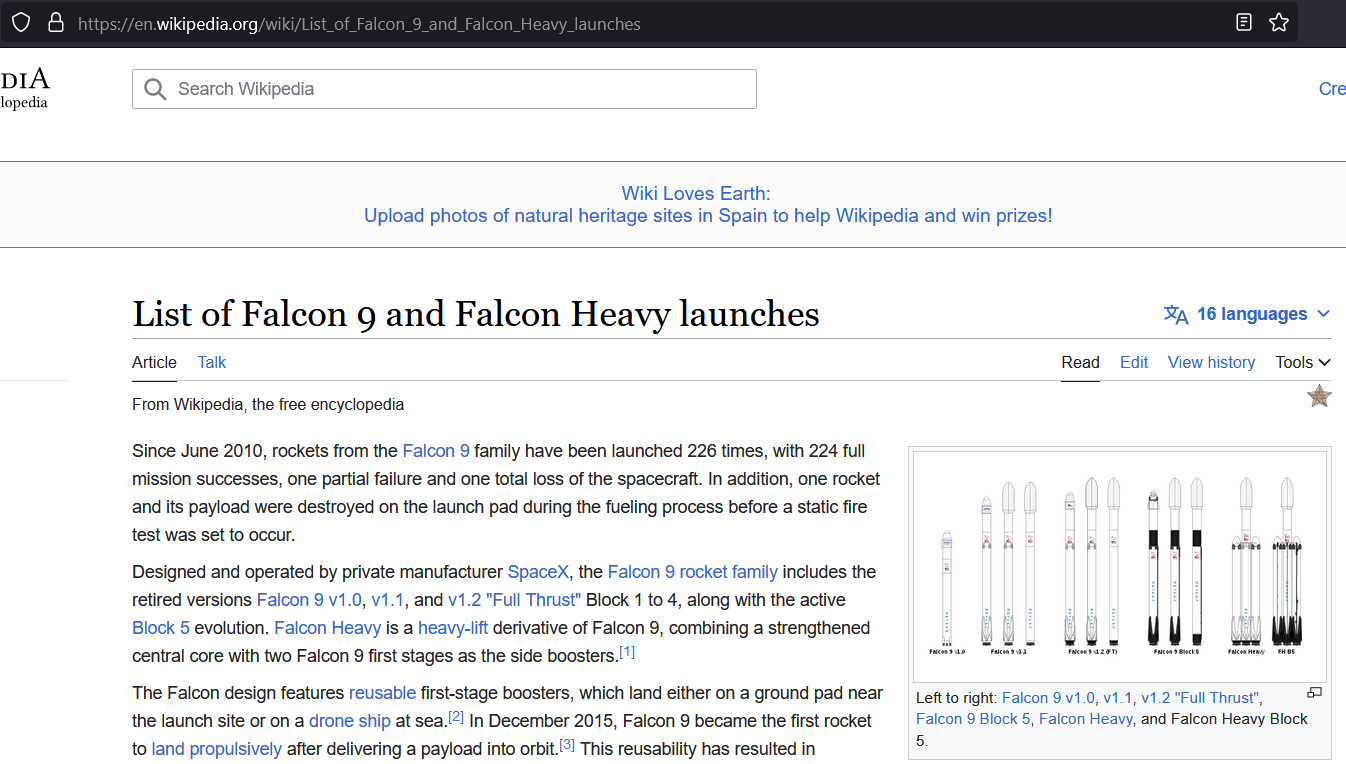

### TASK 2: Extract all column/variable names from the HTML table header


Next, we want to collect all relevant column names from the HTML table header


Let's try to find all tables on the wiki page first. If you need to refresh your memory about `BeautifulSoup`, please check the external reference link towards the end of this lab


## COSMIN:
Veamos un poco la pinta que tiene la web en codigo html para analizar las etiquetas o TAGs que nos sirven para filtrar cabecera, body, imágenes, tablas, etc.

In [15]:
print(soup.prettify())

b'
<!DOCTYPE html>
\n
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 \n
 <head>
  \n
  <meta charset="utf-8"/>
  \n
  <title>
   List of Falcon 9 and Falcon Heavy launches - Wikipedia
  </title>
  \n
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited

In [13]:
# Use the find_all function in the BeautifulSoup object, with element type `table`
soup.find_all('table')
# Assign the result to a list called `html_tables`
html_tables=list(soup.find_all('table'))
html_tables  # <-- tipo lista!

[<table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:100%;">\n\n<tbody><tr>\n<td style="text-align: left; vertical-align: top;">\n<h3><span class="mw-headline" id="Rocket_configurations">Rocket configurations</span></h3>\n<div class="chart noresize" style="margin-top:1em;max-width:420px;">\n<div style="position:relative;min-height:320px;min-width:420px;max-width:420px;">\n<div style="float:right;position:relative;min-height:240px;min-width:320px;max-width:320px;border-left:1px black solid;border-bottom:1px black solid;">\n<div style="position:absolute;left:3px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-color-adjust:exact;border:1px solid LightSteelBlue;border-bottom:none;overflow:hidden;" title="[[Falcon 9 v1.0]]: 2"></div>\n<div style="position:absolute;left:55px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit

Starting from the third table is our target table contains the actual launch records.


In [15]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table.prettify())

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
 \n
 <tbody>
  <tr>
   \n
   <th scope="col">
    Flight No.\n
   </th>
   \n
   <th scope="col">
    Date and
    <br/>
    time (
    <a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">
     UTC
    </a>
    )\n
   </th>
   \n
   <th scope="col">
    <a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">
     Version,
     <br/>
     Booster
    </a>
    <sup class="reference" id="cite_ref-booster_11-0">
     <a href="#cite_note-booster-11">
      [b]
     </a>
    </sup>
    \n
   </th>
   \n
   <th scope="col">
    Launch site\n
   </th>
   \n
   <th scope="col">
    Payload
    <sup class="reference" id="cite_ref-Dragon_12-0">
     <a href="#cite_note-Dragon-12">
      [c]
     </a>
    </sup>
    \n
   </th>
   \n
   <th scope="col">
    Payload mass\n
   </th>
   \n
   <th scope="col">
    Orbit\n
   </th>
   \n
   <th scope="col">
 

You should able to see the columns names embedded in the table header elements `<th>` as follows:


## COSMIN:
Vemos las cabeceras/headers en la etiqueta de 'th' = table header. En cada header está el nombre de la respectiva columna, abajo vemos 'Date and time', 'Version Booster','Launch site'...

```
<tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>
```


Next, we just need to iterate through the `<th>` elements and apply the provided `extract_column_from_header()` to extract column name one by one


In [16]:
column_names = [];

# Apply find_all() function with `th` element on first_launch_table
first_launch_table.find_all('th');

# Iterate each th element and apply the provided extract_column_from_header() to get a column name
for cabecera in list(first_launch_table.find_all('th')):
    column_names.append((extract_column_from_header(cabecera)))
    
#TENEMOS QUE QUITAR LA PARTE DE '\\n' que indica un salto de linea:
for i in range (0,len(column_names)):
    column_names[i] = column_names[i][0:-2]


# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
        
column_names

['Flight No.',
 'Date and time ( )',
 '',
 'Launch site',
 'Payload ',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome',
 '',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7']

In [23]:
for i in range (0,len(column_names)):
    if column_names[i] is None or len(column_names[i]) < 2:
        column_names.pop(i)

column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload ',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

Check the extracted column names


In [24]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload ', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


## TASK 3: Create a data frame by parsing the launch HTML tables


We will create an empty dictionary with keys from the extracted column names in the previous task. Later, this dictionary will be converted into a Pandas dataframe


In [27]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

Next, we just need to fill up the `launch_dict` with launch records extracted from table rows.


Usually, HTML tables in Wiki pages are likely to contain unexpected annotations and other types of noises, such as reference links `B0004.1[8]`, missing values `N/A [e]`, inconsistent formatting, etc.


To simplify the parsing process, we have provided an incomplete code snippet below to help you to fill up the `launch_dict`. Please complete the following code snippet with TODOs or you can choose to write your own logic to parse all launch tables:


## NOTE:  DON´T KNOW HOW TO COMPLETE THIS CODE 

In [64]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            launch_dict['Flight No.'].append(flight_number)
            #print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            #print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            #print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            #print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string
            #print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)
            

## FROM NOW ON ARE TESTINGS FOR CREATING A DICTIONARY:

In [25]:
tablas=soup.find_all('table', class_="wikitable plainrowheaders collapsible");
for tabla in tablas:
    print(tabla.title)

None
None
None
None
None
None
None
None
None


In [28]:
launch_dict.keys()

dict_keys(['Flight No.', 'Launch site', 'Payload ', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Payload', 'Version Booster', 'Booster landing', 'Date', 'Time'])

In [29]:
launch_dict = pd.DataFrame(columns=['Flight No.', 'Launch site', 'Payload ', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Payload', 'Version Booster', 'Booster landing', 'Date','Time' ])


In [70]:
#for i in range (0, len(tablas)):
for row in tablas[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        #n_vuelo = col[1].text
        #fecha=col[1].text
        #datatimelist=date_time(col[0].text);
        #date = datatimelist[0].strip(',')
        #time = datatimelist[1]
        lugar = col[2].text
        launch_dict = launch_dict.append({"Flight No.":n_vuelo, "Date":date, "Launch site":lugar}, ignore_index=True)

launch_dict

IndexError: list index out of range

In [79]:
!pip install html5lib==1.1;

### OTRA FORMA/ OTHER WAY: Usando read_html de pandas. El problema es que normalmente lee con saltos de linea y formatos mas raros

In [30]:
import html5lib

In [31]:
dataframe_list = pd.read_html(static_url, flavor='bs4')

In [36]:
pd.read_html(str(tablas[0]), flavor='bs4')[0]

Flight No.\n                                  Date andtime ()\n  \
0           1\n                                4 June 2010,18:45\n   
1           1\n  First flight of Falcon 9 v1.0.[11] Used a boil...   
2           2\n                        8 December 2010,15:43[13]\n   
3           2\n  Maiden flight of Dragon capsule, consisting of...   
4           3\n                            22 May 2012,07:44[17]\n   
5           3\n  Dragon spacecraft demonstrated a series of tes...   
6           4\n                         8 October 2012,00:35[21]\n   
7           4\n                         8 October 2012,00:35[21]\n   
8           4\n  CRS-1 was successful, but the secondary payloa...   
9           5\n                               1 March 2013,15:10\n   
10          5\n  Last launch of the original Falcon 9 v1.0 laun...   
11          6\n                      29 September 2013,16:00[30]\n   
12          6\n  First commercial mission with a private custom...   
13          7\n                        3 December 2013,22:41[34]\n   
14          7\n  First Geostationary transfer orbit (GTO) launc...   

                                                   \n  \
0                              F9 v1.0[7]B0003.1[8]\n   
1   First flight of Falcon 9 v1.0.[11] Used a boil...   
2                              F9 v1.0[7]B0004.1[8]\n   
3   Maiden flight of Dragon capsule, consisting of...   
4                              F9 v1.0[7]B0005.1[8]\n   
5   Dragon spacecraft demonstrated a series of tes...   
6                              F9 v1.0[7]B0006.1[8]\n   
7                              F9 v1.0[7]B0006.1[8]\n   
8   CRS-1 was successful, but the secondary payloa...   
9                              F9 v1.0[7]B0007.1[8]\n   
10  Last launch of the original Falcon 9 v1.0 laun...   
11                               F9 v1.1[7]B1003[8]\n   
12  First commercial mission with a private custom...   
13                                     F9 v1.1B1004\n   
14  First Geostationary transfer orbit (GTO) launc...   

                                        Launch site\n  \
0                                      CCAFS,SLC-40\n   
1   First flight of Falcon 9 v1.0.[11] Used a boil...   
2                                      CCAFS,SLC-40\n   
3   Maiden flight of Dragon capsule, consisting of...   
4                                      CCAFS,SLC-40\n   
5   Dragon spacecraft demonstrated a series of tes...   
6                                      CCAFS,SLC-40\n   
7                                      CCAFS,SLC-40\n   
8   CRS-1 was successful, but the secondary payloa...   
9                                      CCAFS,SLC-40\n   
10  Last launch of the original Falcon 9 v1.0 laun...   
11                                      VAFB,SLC-4E\n   
12  First commercial mission with a private custom...   
13                                     CCAFS,SLC-40\n   
14  First Geostationary transfer orbit (GTO) launc...   

                                            Payload\n  \
0              Dragon Spacecraft Qualification Unit\n   
1   First flight of Falcon 9 v1.0.[11] Used a boil...   
2                Dragon demo flight C1(Dragon C101)\n   
3   Maiden flight of Dragon capsule, consisting of...   
4           Dragon demo flight C2+[18](Dragon C102)\n   
5   Dragon spacecraft demonstrated a series of tes...   
6                     SpaceX CRS-1[22](Dragon C103)\n   
7                                   Orbcomm-OG2[23]\n   
8   CRS-1 was successful, but the secondary payloa...   
9                     SpaceX CRS-2[22](Dragon C104)\n   
10  Last launch of the original Falcon 9 v1.0 laun...   
11                                 CASSIOPE[22][31]\n   
12  First commercial mission with a private custom...   
13                                SES-8[22][35][36]\n   
14  First Geostationary transfer orbit (GTO) launc...   

                                       Payload mass\n  \
0                                                  \n   
1   First flight of Falcon 9 

After you have fill in the parsed launch record values into `launch_dict`, you can create a dataframe from it.


In [37]:
df=pd.DataFrame(launch_dict)
df

Empty DataFrame
Columns: [Flight No., Launch site, Payload , Payload mass, Orbit, Customer, Launch outcome, Payload, Version Booster, Booster landing, Date, Time]
Index: []

We can now export it to a <b>CSV</b> for the next section, but to make the answers consistent and in case you have difficulties finishing this lab. 

Following labs will be using a provided dataset to make each lab independent. 


<code>df.to_csv('spacex_web_scraped.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Yan Luo</a>


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Nayef Abou Tayoun</a>


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-06-09        | 1.0     | Yan Luo    | Tasks updates           |
| 2020-11-10        | 1.0     | Nayef      | Created the initial version |


Copyright © 2021 IBM Corporation. All rights reserved.
